In [84]:
# imports and loading
import pandas as pd
from pymodulon.io import *
from os import path
import matplotlib.pyplot as plt

interim_dir = path.join('..','data','interim')
ica_data = load_json_model(path.join(interim_dir,'zmo_raw.json.gz'))
proteomics_df = pd.read_excel('../data/external/proteomics_10_3389_fmicb_2019_02596.XLSX', sheet_name = 'LFQ', index_col = 0)


# mid-glucose (T1, about 50% glucose utilized)
# late glucose (T2, about 5–10 g glucose/L remaining)
# early xylose (T3, ∼1 h after glucose was completely depleted)
# late xylose (T4, ∼24 h after glucose was completely depleted)
# let's focus on SynH3- samples, as I'm not particularlly interested in stressors
column_to_sample = {
    'LDI_early_glucose_fold_change' : 'lignocellulose_ferment:high_ACSH_early',
    'LDI_late_glucose_fold_change' : 'lignocellulose_ferment:high_ACSH_mid',
    'LDI_early_xylose_fold_change' : 'lignocellulose_ferment:high_ACSH_late',
    'LDI_late_xylose_fold_change' : 'lignocellulose_ferment:high_ACSH_stat',
    'no_LDI_early_glucose_fold_change' : 'lignocellulose_ferment:low_ACSH_early',
    'no_LDI_late_glucose_fold_change' : 'lignocellulose_ferment:low_ACSH_mid',
    'no_LDI_early_xylose_fold_change' : 'lignocellulose_ferment:low_ACSH_late',
    'no_LDI_late_xylose_fold_change' : 'lignocellulose_ferment:low_ACSH_stat',
}


sample_X_df = pd.DataFrame(index = ica_data.X.index)
for group_id, group_df in ica_data.sample_table.groupby('full_name'):
    sample_X_df[group_id] = ica_data.X[group_df.index].T.mean()
    

/opt/anaconda3/envs/pymodulon/lib/python3.7/site-packages/ipykernel_launcher.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


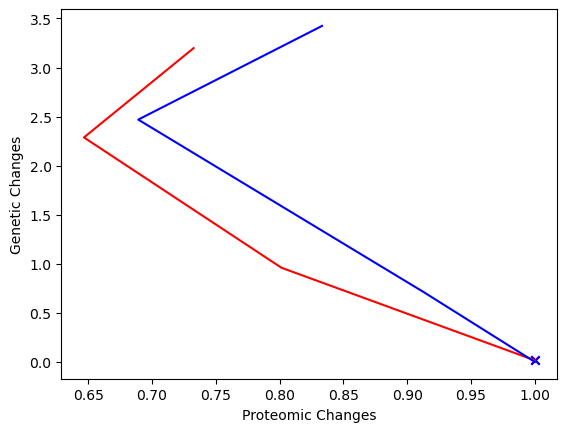

In [94]:
# let's look at expression, iM activity, and proteomics of the genes in question
gene = 'ZCP4_1350'
#prot_index = ica_data.gene_table.loc[gene].ZM4_locus.split('_')[1]
gene_changes = sample_X_df[column_to_sample.values()].loc[gene]
prot_changes = ica_data.gene_table.loc[gene][column_to_sample.keys()].rename(index = column_to_sample)
#proteomics_df.loc[prot_index].rename(index = column_to_sample)

order_1 = [
    'lignocellulose_ferment:high_ACSH_early', 
    'lignocellulose_ferment:high_ACSH_mid', 
    'lignocellulose_ferment:high_ACSH_late', 
    'lignocellulose_ferment:high_ACSH_stat',
]
order_2 = [
    'lignocellulose_ferment:low_ACSH_early', 
    'lignocellulose_ferment:low_ACSH_mid', 
    'lignocellulose_ferment:low_ACSH_late', 
    'lignocellulose_ferment:low_ACSH_stat'
]

plt.scatter(prot_changes.loc[order_1][0], gene_changes.loc[order_1][0], c = 'red', marker = 'x')
plt.scatter(prot_changes.loc[order_2][0], gene_changes.loc[order_1][0], c = 'blue', marker = 'x')
plt.plot(prot_changes.loc[order_1], gene_changes.loc[order_1], c = 'red', label = 'high_ACSH')
plt.plot(prot_changes.loc[order_2], gene_changes.loc[order_2], c = 'blue', label = 'low_ACSH')
plt.xlabel('Proteomic Changes')
plt.ylabel('Genetic Changes')
plt.show()

In [88]:
prot_changes.loc[order]

lignocellulose_ferment:high_ACSH_early         1.0
lignocellulose_ferment:high_ACSH_mid      0.801393
lignocellulose_ferment:high_ACSH_late     0.646594
lignocellulose_ferment:high_ACSH_stat     0.732578
lignocellulose_ferment:low_ACSH_early          1.0
lignocellulose_ferment:low_ACSH_mid       0.912753
lignocellulose_ferment:low_ACSH_late      0.689145
lignocellulose_ferment:low_ACSH_stat      0.833179
Name: ZCP4_1350, dtype: object

In [89]:
gene_changes.loc[order]

lignocellulose_ferment:high_ACSH_early    0.016055
lignocellulose_ferment:high_ACSH_mid      0.959770
lignocellulose_ferment:high_ACSH_late     2.287757
lignocellulose_ferment:high_ACSH_stat     3.198192
lignocellulose_ferment:low_ACSH_early     0.000000
lignocellulose_ferment:low_ACSH_mid       0.712518
lignocellulose_ferment:low_ACSH_late      2.469447
lignocellulose_ferment:low_ACSH_stat      3.424286
Name: ZCP4_1350, dtype: float64